# Problem set 2

## Team
Please write here your names and team number.

* Team name:
* Team members:

## Using Colab with GitHub
To utilize GPU support for model training, we highly recommend to open this notebook with Google Colab. Simply, change the domain from 'github.com' to 'githubtocolab.com' and refresh the site to open the notebook in Colab.
If you haven't used Colab before with private repositories, make sure to grant Colab access to your private repositories (see screenshot) and after that just try to change the domain again.

Finally, you should make sure that you add a GPU to your Colab notebook. You can do so by clicking on `Runtime` →  `Change runtime type` → `Hardware accelerator`  →  `GPU`.

## Submission

Make sure that you always commit and push the changes you make in Colab back to GitHub. To do so from within a Colab notebook, click `File` → `Save a copy in GitHub`. You will be prompted to add a commit message, and after you click OK, the notebook will be pushed to your repository. Only changes that are visible in your GitHub repository on the main branch will be considered for grading. If you close Colab in your browser without pushing your changes to GitHub or saving them on Google Drive, they will be lost.

Make sure that all your work has been pushed to GitHub before the deadline.


Check that the GPU  enabled in your colab notebook by running the cell below.

In [1]:
import torch
# Check is GPU is enabled
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))

# Get specific GPU model
if str(device) == "cuda:0":
  print("GPU: {}".format(torch.cuda.get_device_name(0)))

Device: cuda:0
GPU: Tesla T4


You will be working with the LFW (Labeled Faces in the Wild) dataset. The dataset contains 13233 pictures of 5749 people. Running the lines below will download the data and return a random picture from the dataset.

100%|██████████| 243346528/243346528 [01:52<00:00, 2159663.74it/s]


Extracting /content/lfw-py/lfw-funneled.tgz to /content/lfw-py


100%|██████████| 94770/94770 [00:00<00:00, 906112.16it/s]


100%|██████████| 94727/94727 [00:00<00:00, 811598.19it/s]


The dataset has 13233 images


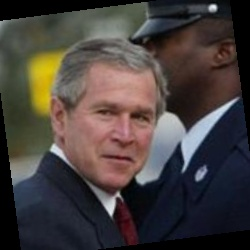

In [5]:
from torchvision.datasets import LFWPeople
import os
import numpy as np

download = LFWPeople(root=os.getcwd(), download=True) #downloads the dataset to your current directory
label_file = os.path.join(download.root, download.names)
print(f"The dataset has {len(download)} images")
pic, _ = download[np.random.randint(len(download))]
pic

# Task 1: Transform the data

 Your task is to train a classifier to classify the celebrities in the dataset. We want to select only the 50 most frequent people in the dataset, all the other people should be mapped to a common class.
- Implement the function `most_frequent_n_people` that reads names and frequencies from the `lfw-names.txt` and returns dictionaries mapping names to labels and frequencies of the most frequent people.
- Plot a histogram with the frequencies of the most frequent people sorted by their new labels (`[0-49]`). Make sure to insert both name and label in the histogram (e.g. `Arnold Schwarzenegger:4`).
- Implement the function `retrieve_datasets` that takes as input the mapping of old to new labels and returns train and test datasets which contain the input tensors and corresponding new labels. All other less frequent people should be mapped to the label `n_classes`. The train and test dataset should have a size proportion of 80-20.

In [6]:
# Implement the function most_frequent_n_people that reads names and frequencies from the lfw-names.txt and returns dictionaries mapping names to labels and frequencies of the most frequent people.

from torch.utils.data import DataLoader, Subset, Dataset, random_split
import matplotlib.pyplot as plt

def most_frequent_n_people(label_file, n_classes):
    with open(label_file, 'r') as f:
        lines = f.readlines()

    name_to_old_label = {}
    name_to_new_label = {}
    name_to_count = {}

    for i, line in enumerate(lines[1:]):  # Skip the header line
        name, count = line.strip().split('\t')
        name_to_old_label[name] = i
        name_to_count[name] = int(count)

    # Sort names by frequency in descending order
    sorted_names = sorted(name_to_count, key=name_to_count.get, reverse=True)

    # Assign new labels to the most frequent people
    for i, name in enumerate(sorted_names[:n_classes]):
        name_to_new_label[name] = i

    return name_to_old_label, name_to_new_label, name_to_count

In [11]:
#Plot a histogram with the frequencies of the most frequent people sorted by their new labels ([0-49]).
def plot_histogram(name_to_new_label, name_to_count):
    names = list(name_to_new_label.keys())
    frequencies = [name_to_count[name] for name in names]
    labels = [name_to_new_label[name] for name in names]

    fig, ax = plt.subplots()
    ax.bar(labels, frequencies)

    ax.set_xlabel("Label")
    ax.set_ylabel("Frequency")
    ax.set_title("Frequencies of Most Frequent People")

    for i, (name, label, frequency) in enumerate(zip(names, labels, frequencies)):
        ax.text(label, frequency, f"{name}:{label}", ha='center', va='bottom', rotation=90)

    return fig, ax

Text(0.5, 0.98, 'Most frequent 50 people and new labels')

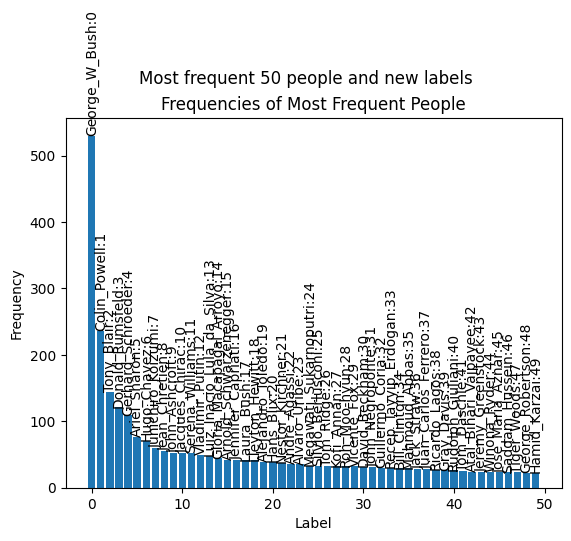

In [12]:
n_classes =50
name_to_old_label, name_to_new_label, name_to_count = most_frequent_n_people(label_file, n_classes)
fig, ax = plot_histogram(name_to_new_label, name_to_count)
fig.suptitle(f'Most frequent {n_classes} people and new labels')

<BarContainer object of 2 artists>

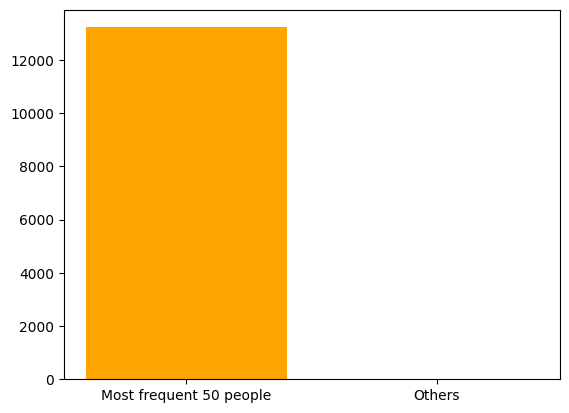

In [19]:
# This graph is not working because name_to_count.values() alculates the sum of all the values in name_to_count, which stores the frequency of each person in the dataset
tot_people = sum(name_to_count.values())
tot_others = len(download) - tot_people
plt.bar([0,1], [tot_people, tot_others], tick_label=[f'Most frequent {n_classes} people', 'Others'], color='orange')

<BarContainer object of 2 artists>

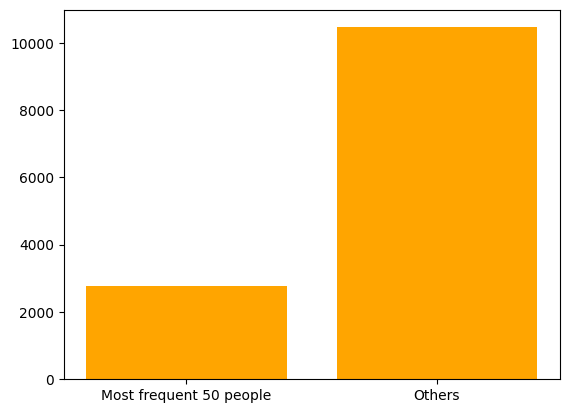

In [18]:
# This line iterates through the names in the name_to_new_label dictionary, which contains only the most frequent 50 people.
# TThis only counts for the total number of images belonging to the most frequent 50 people
tot_people = sum(name_to_count[name] for name in name_to_new_label)
tot_others = len(download) - tot_people
plt.bar([0,1], [tot_people, tot_others], tick_label=[f'Most frequent {n_classes} people', 'Others'], color='orange')

In [ ]:
# Implement the function retrieve_datasets that takes as input the mapping of old to new labels and returns train and test datasets which contain the input tensors and corresponding new labels. All other less frequent people should be mapped to the label n_classes. The train and test dataset should have a size proportion of 80-20.

def retrieve_datasets(old_to_new_label, n_classes, proportion=(0.8, 0.2)):
  '''#TODO: reload the data with pictures as tensors and labels and split the dataset'''
  return train_dataset, test_dataset

old_to_new_label = {old_val: name_to_new_label[key] for key, old_val in name_to_old_label.items()}
train_dataset, test_dataset = retrieve_datasets(old_to_new_label, n_classes)
print(f"Len of train dataset {len(train_dataset)}, len of test dataset: {len(test_dataset)}")

In [ ]:
from torch.utils.data import DataLoader, Subset, Dataset, random_split
import numpy as np
import torch
from torchvision.datasets import LFWPeople
import os


def retrieve_datasets(old_to_new_label, n_classes, proportion=(0.8, 0.2)):
    """Reloads data with pictures as tensors and labels and splits the dataset."""

    class CustomDataset(Dataset):
        def __init__(self, download, old_to_new_label, n_classes):
            self.download = download
            self.old_to_new_label = old_to_new_label
            self.n_classes = n_classes

        def __len__(self):
            return len(self.download)

        def __getitem__(self, idx):
            image, old_label = self.download[idx]
            # Map to n_classes if not in most frequent
            new_label = self.old_to_new_label.get(old_label, self.n_classes)
            # Convert image to tensor and change to CHW format
            image_tensor = np.array(image)
            image_tensor = image_tensor.transpose(2, 0, 1)
            image_tensor = torch.from_numpy(image_tensor).float()
            return image_tensor, new_label

    # Download the dataset (if not already downloaded)
    download = LFWPeople(root=os.getcwd(), download=True)

    # Create the custom dataset
    dataset = CustomDataset(download, old_to_new_label, n_classes)

    # Split the dataset into train and test sets
    train_size = int(proportion[0] * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    return train_dataset, test_dataset

In [23]:
from torch.utils.data import DataLoader, Subset, Dataset, random_split
import numpy as np
import torch

def retrieve_datasets(old_to_new_label, n_classes, proportion=(0.8, 0.2)):

    class CustomDataset(Dataset):
        def __init__(self, download, old_to_new_label, n_classes):
            self.download = download
            self.old_to_new_label = old_to_new_label
            self.n_classes = n_classes

        def __len__(self):
            return len(self.download)

        def __getitem__(self, idx):
            image, old_label = self.download[idx]
            new_label = self.old_to_new_label.get(old_label, self.n_classes)  # Map to n_classes if not in most frequent
            image_tensor = np.array(image)  # Convert PIL image to NumPy array to create a PyTorch tensor from the image data
            image_tensor = image_tensor.transpose(2, 0, 1)  # Change to CHW format
            image_tensor = torch.from_numpy(image_tensor).float()  # Convert to PyTorch tensor
            return image_tensor, new_label

    # Create a custom dataset
    dataset = CustomDataset(download, old_to_new_label, n_classes)

    # Split the dataset into train and test sets
    train_size = int(proportion[0] * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    return train_dataset, test_dataset

In [26]:
old_to_new_label = {old_val: name_to_new_label.get(key, n_classes) for key, old_val in name_to_old_label.items()}
train_dataset, test_dataset = retrieve_datasets(old_to_new_label, n_classes)
print(f"Len of train dataset {len(train_dataset)}, len of test dataset: {len(test_dataset)}")

Len of train dataset 10586, len of test dataset: 2647


## Task 2: Implement a CNN model
Implement a classification model to predict the label of the faces in the dataset. You are free to experiment with the network architecture. However your model **must** contain:
- Convolutional, linear, and pooling layers only.
- At least 5 convolutional layers, with at least two different kernel sizes
- A final output layer that is customizable to the number of classes that we want to predict.
- If you are adding identity/skip connections, make sure to change to model parent class to `nn.Module` and to implement a `forward()` function.
- Briefly explain why you chose the particular architecture you implemented (around 2-3 sentences).


In [ ]:
import torch
import torch.nn as nn

class MyCNNModel(nn.Sequential):

  def __init__(self,
               n_classes):

    super().__init__()
    '''#TODO: construction your model'''



In [ ]:
'''#TODO: print one iteration of your model to test its correctness'''

my_model = MyCNNModel(n_classes)
X, y = train_dataset[0]
my_model(X[None, :])

## Training

We define a `Trainer` function to train our model that returns avg loss and avg accuracy per epoch. We set the configuration of the trainer is set in the `cfg` dictionary. Use the trainer to train your model and make sure to print and plot avg loss and accuracy using the in-built commands.

In [ ]:
from datetime import datetime as dt
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

cfg = {
    'batch_size': 64,
    'criterion': 'CrossEntropyLoss', #change to 'nn.NLLLoss' if you are applying a softmax in the last layer of your model
    'epochs': 1,
    'learning_rate': 0.001,
    'optimizer':'Adam',
    'seed':42,

}

class Trainer:

    def __init__(self, model, cfg):
        self.model = model
        self.cfg = cfg

        for key, val in cfg.items():
            setattr(self, key, val)

        self.optimizer = getattr(optim, self.optimizer)(self.model.parameters(), lr=self.learning_rate)
        self.criterion = getattr(nn, self.criterion)()


    def iter_step(self, X, Y):
        Y_pred = self.model(X)
        loss = self.criterion(Y_pred, Y)
        acc = (Y_pred.argmax(dim=-1) == Y).to(torch.float).mean()
        return loss, acc

    def train(self, dataset):
        train_dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, generator=torch.manual_seed(self.seed))
        avg_loss, avg_acc = [], []
        tot_loss, tot_acc = 0, 0
        for epoch in range(self.epochs):
            iterdata = iter(train_dataloader)
            train_size = len(iterdata)
            pbar = tqdm(iterable=range(train_size))

            for i in pbar:
                batch = next(iterdata)
                X_batch, Y_batch = batch #this is needed for compatibility with pbar
                self.model.train()
                self.optimizer.zero_grad()
                loss, acc = self.iter_step(X_batch, Y_batch)
                loss.backward()
                self.optimizer.step()
                tot_loss += loss.item()
                tot_acc += acc.item()
                avg_loss.append(tot_loss / max(1, len(avg_loss)))
                avg_acc.append(tot_acc / max(1, len(avg_acc)))
                desc = f'Epoch:{epoch} - Avg loss:{avg_loss[-1]:.5f} - Avg acc:{avg_acc[-1]:.5f}'
                pbar.set_description(desc)

        return avg_loss, avg_acc

    def test(self, dataset):
        avg_test_loss, avg_test_acc = [], []
        test_loss, test_acc = 0, 0
        self.model.eval()
        test_dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True, generator=torch.manual_seed(self.seed))

        for X_batch, Y_batch in iter(test_dataloader):
            loss, acc = self.iter_step(X_batch, Y_batch)
            test_loss += loss.item()
            test_acc += acc
            avg_test_loss.append(test_loss / max(1, len(avg_test_loss)))
            avg_test_acc.append(test_acc / max(1, len(avg_test_acc)))

        return avg_test_loss, avg_test_acc



In [ ]:
'''#TODO: train your model, plot accuracy and loss by iteration (one iteration=one batch)'''
my_trainer = Trainer(my_model, cfg)
train_loss, train_acc = my_trainer.train(train_dataset)
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.plot(range(len(train_loss)), train_loss)
ax1.plot(range(len(train_acc)), train_acc)
ax0.set_title('Training loss')
ax1.set_title('Training accuracy')

In [ ]:
'''#TODO: test your model, plot accuracy and loss by iteration (one iteration=one batch)'''
test_loss, test_acc = my_trainer.test(test_dataset)
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.plot(range(len(test_loss)), test_loss)
ax1.plot(range(len(test_acc)), test_acc)
ax0.set_title('Test loss')
ax1.set_title('Test accuracy')

## Task 3: Tune your model hyperparameters (optional)

Implement a method <code>grid_search</code>, which looks for the best possible learning rates and training batch sizes for your model <code>MyCNNModel</code> and returns the best possible model, the corresponding training configuration, and the final training avg losses and accuracies (as numbers).

In [ ]:
def grid_search(train_dataset, cfg, learning_rates=[10**-1, 10**-2, 10**-3], batch_sizes=[2**5, 2**6, 2**7]):
    '''#TODO: here your code '''
    return best_model, best_cfg, best_avg_loss, best_avg_acc


best_model, best_cfg, best_avg_loss, best_avg_acc = grid_search(train_dataset, cfg, learning_rates=[10**-1, 10**-2, 10**-3], batch_sizes=[2**5, 2**6, 2**7])
print(f"Best model achieves {best_avg_loss:.2f} loss and {best_avg_acc:.1%} accuracy").


## Task 3: Load and fine-tune a pre-trained model

<ul>
  <li>Load and train a pre-trained model for classification problems, such as those made available in <a href="https://huggingface.co/docs/timm">Hugging Face's timm library</a>. </li>
  <li> Make sure to modify the output layer to be compatible with the number of classes. </li>
  <li>Print a summary of your results.</li>
  <li>Briefly explain why you chose the particular architecture you did (around 2-3 sentences).</li>
  </ul>
  
<b>Note</b>: in case you run into computing-related (e.g. memory) issues, consider choosing another model.

In [ ]:
'''#TODO: import and fine-tune a pretrained model'''
loaded_model = None #here your loaded model
loaded_trainer = Trainer(loaded_model, cfg)

In [ ]:
'''#TODO: train your model, plot accuracy and loss by iteration (one iteration=one batch)'''
train_loss, train_acc = loaded_trainer.train(train_dataset)
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.plot(range(len(train_loss)), train_loss)
ax1.plot(range(len(train_acc)), train_acc)
ax0.set_title('Training loss')
ax1.set_title('Training accuracy')

In [ ]:
'''#TODO: test your model, plot accuracy and loss by iteration (one iteration=one batch)'''
test_loss, test_acc = loaded_trainer.test(test_dataset)
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.plot(range(len(test_loss)), test_loss)
ax1.plot(range(len(test_acc)), test_acc)
ax0.set_title('Test loss')
ax1.set_title('Test accuracy')


<a name="results-and-discussion"></a>
# Task  4: Results and discussion

Report the final metrics and make a few comments on the overall performance for the networks you implemented (3-4 lines).

| Test metric         | your model | pre-trained model | your tuned model (optional) |
|---------------------|--------------------|-------------------|-----------------------|
| Accuracy (train)           |              |             |                |                     
| Loss (train)               |               |             |                |    
| Accuracy (test)           |              |             |                |                     
| Loss (test)               |               |             |                |              
             



